<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [175]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib

In [176]:
# download training dataset for predict method
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2023-04-30 23:05:12--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.3’

shape_predictor_68_ 100%[===================>]  61.07M  78.8MB/s    in 0.8s    

2023-04-30 23:05:13 (78.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.3’ saved [64040097/64040097]

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [177]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Helper Function </font></h3>

In [178]:
# this helper function has been copied from the link provided in the question

def shape_to_np(shape,dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [179]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    # initialize face detector
    detector = dlib.get_frontal_face_detector()

    # initialize facial landmarks predictor
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

    # gray-scale the images
    gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # initialize result array
    result = gray_face.copy()

    # detect face
    face_rects = detector(gray_face, 1)

    # loop over faces found in image (it is only one face here!)
    for (i, face_rect) in enumerate(face_rects):

      # predict the facial landmarks
      shape = predictor(gray_face, face_rect)

      # convert shape object to np.array to make it easier to work with
      landmarks = shape_to_np(shape)

    # get 4 important landmarks
    #                            nose,         chin,        left,        right
    face_landmarks = np.float32([landmarks[30],landmarks[9],landmarks[2],landmarks[14]])
    
    # get 4 landmarks on mask
    mask_landmarks = np.float32([[600,150],[600,710],[100,420],[1155,270]])
    
    # get transform matrix
    mat = cv2.getPerspectiveTransform(src = mask_landmarks,dst = face_landmarks)
    
    # perform transform matrix
    real_shape = (gray_face.shape[1],gray_face.shape[0])
    transformed_mask = cv2.warpPerspective(gray_mask, mat, real_shape)

    # put mask on face!
    result = cv2.bitwise_or(result, transformed_mask)
    
    return result

<h3><font color = "#079e05"> Show key points on face </font></h3>

(999, 1200)


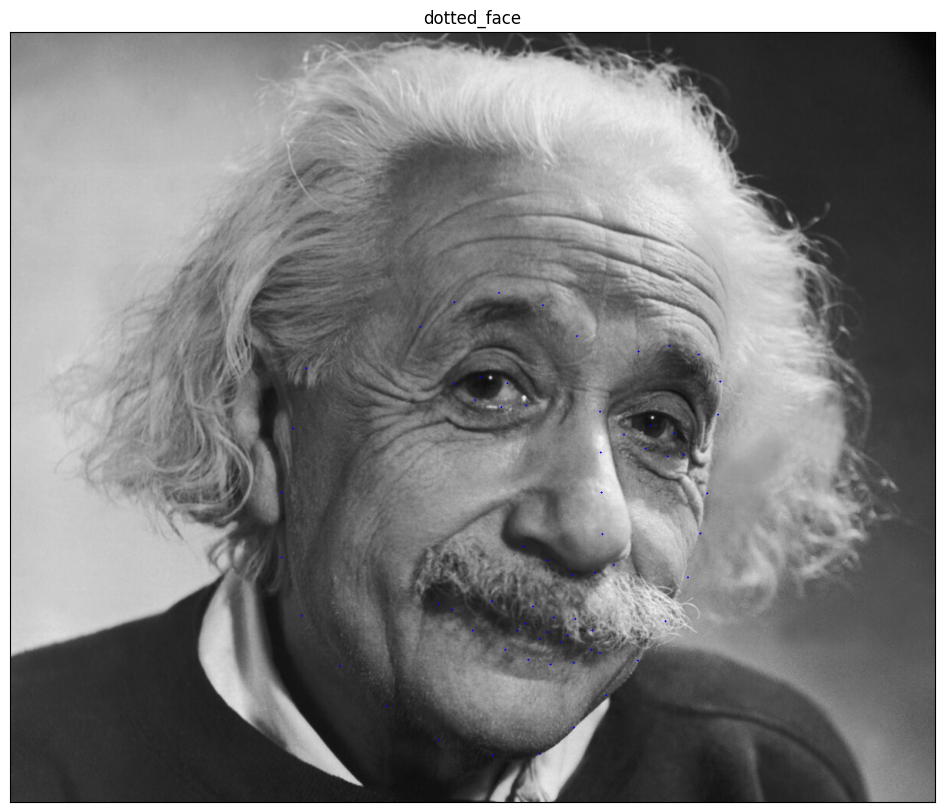

In [182]:
# initialize face detector
detector = dlib.get_frontal_face_detector()

# initialize facial landmarks predictor
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
print(gray_face.shape)
# detect face
face_rects = detector(gray_face, 1)

# predict the facial landmarks
shape = predictor(gray_face, face_rects[0])

# convert shape object to np.array to make it easier to work with
landmarks = shape_to_np(shape)
for (x,y) in landmarks:
		cv2.circle(face, (x,y), 1, (0, 0, 255), -1)
  
image_list = []
image_list.append([face, 'dotted_face', 'img'])
plotter(image_list, 1, 1, True, 20, 10, '3_dotted_face')

<h3><font color = "#079e05"> Show the result </font></h3>

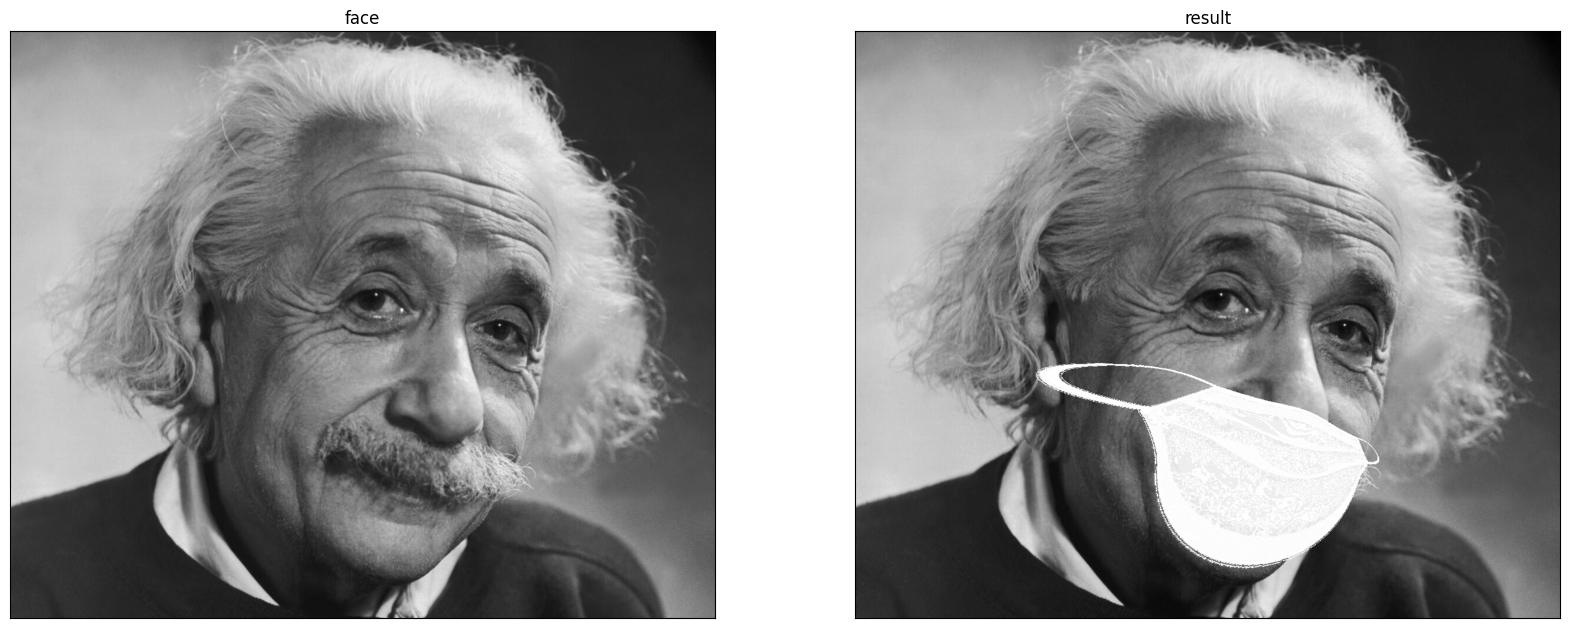

In [181]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')